In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mano
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# Reading the dataset
data = pd.read_csv(r'nyc-rolling-sales-dirty (1).csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


In [10]:
#We have 84548 rows and 22 columns 
data.shape

(84548, 22)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84518 non-null  object 
 3   BUILDING CLASS CATEGORY         84497 non-null  object 
 4   TAX CLASS AT PRESENT            84541 non-null  object 
 5   BLOCK                           84532 non-null  float64
 6   LOT                             84548 non-null  object 
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84503 non-null  object 
 10  APARTMENT NUMBER                84547 non-null  object 
 11  ZIP CODE                        84512 non-null  float64
 12  RESIDENTIAL UNITS               

## Remove any unnecessary data 

In [12]:
data.drop(['Unnamed: 0', 'EASE-MENT'],1, inplace=True)

#Since Unnamed column is only used for iterating records, we will drop it. Ease-ment is the right use another's property so we will remove it for now

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84518 non-null  object 
 2   BUILDING CLASS CATEGORY         84497 non-null  object 
 3   TAX CLASS AT PRESENT            84541 non-null  object 
 4   BLOCK                           84532 non-null  float64
 5   LOT                             84548 non-null  object 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object 
 7   ADDRESS                         84503 non-null  object 
 8   APARTMENT NUMBER                84547 non-null  object 
 9   ZIP CODE                        84512 non-null  float64
 10  RESIDENTIAL UNITS               84548 non-null  int64  
 11  COMMERCIAL UNITS                84548 non-null  int64  
 12  TOTAL UNITS                     

## Find out all the data entry errors

In [14]:
data.isna().sum()

BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

## Since the empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [15]:
# Should be Numeric: LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS
# Should be datetime format: SALE DATE
# Should be categorical: BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,ZIP CODE, YEAR BUILT, BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE

data['SALE DATE']= pd.to_datetime(data['SALE DATE'], errors='coerce')
numeric = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'YEAR BUILT','RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LOT']
for col in numeric: 
    # coerce for missing values
    data[col] = pd.to_numeric(data[col], errors='coerce')

categorical = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',  'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical: 
    #coerce for missing values
    data[col] = data[col].astype('category')

In [16]:
data.isna().sum()

#Number of missing values

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

## Convert them to missing values or deal with them logically as appropriate

## NEIGHBORHOOD

In [17]:
data['NEIGHBORHOOD'].isna().sum()

#We have 30 missing values to deal with

30

In [18]:
data['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
PELHAM BAY                     1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [19]:
data.mask(data=='nan', None).ffill()

#Filling nan with None so it can not be counted as a string

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,65000,NaN,NaN,10009.0,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,NaT
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,C7,NaN,,10009.0,28,3,31,4616.0,18690.0,1900,2,C7,6625000.0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,C7,NaN,,10009.0,16,1,17,2212.0,7803.0,1900,2,C7,6625000.0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,402.0,21.0,C4,NaN,,10009.0,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,404.0,55.0,C2,NaN,,10009.0,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34.0,B9,37 QUAIL LANE,,10309.0,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78.0,B9,32 PHEASANT LANE,,10309.0,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60.0,B2,49 PITNEY AVENUE,,10309.0,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28.0,K6,2730 ARTHUR KILL ROAD,,10309.0,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [20]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

In [21]:
#find out the BOROUGH  where NEIGHBORHOOD are missing (1,2,3,4,5)
print(data[data['NEIGHBORHOOD'].isna()]['BOROUGH'])

#This indicates that the missing values in NEIGHBORHOOD follows a sequence. So we can use forward-fill to fill it

21231    2
21232    2
21233    2
21234    2
21235    2
21236    2
21237    2
21238    2
21239    2
21240    2
21241    2
21242    2
21243    2
21244    2
21245    2
21246    2
21247    2
21248    2
40709    3
40710    3
40711    3
40712    3
40713    3
40714    3
40715    3
40716    3
40717    3
40718    3
40719    3
40720    3
Name: BOROUGH, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [22]:
data['NEIGHBORHOOD'].fillna(method='ffill',inplace=True)

In [23]:
data['NEIGHBORHOOD'].isna().sum()

0

In [24]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

## Apartment Number

In [25]:
data.drop(["APARTMENT NUMBER"], axis=1, inplace=True)

#We will drop apartment number column since its of no use

In [26]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

## Tax Class at Present

In [27]:
data['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [28]:
## In order to get 4 classes, we will get rid of extra classes by replacing the values

In [29]:
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].replace({'1A': '1','1B': '1','1C':'1','2A':'2','2B':'2','2C':'2'})

In [30]:
data['TAX CLASS AT PRESENT'].value_counts()

1    41497
2    36162
4     6140
       738
3        4
Name: TAX CLASS AT PRESENT, dtype: int64

In [31]:
print(data[data['TAX CLASS AT PRESENT'].isna()]['BOROUGH'])

#find out the BOROUGH  where TAX CLASS AT PRESENT are missing (1,2,3,4,5)

2    1
3    1
4    1
5    1
6    1
7    1
8    1
Name: BOROUGH, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [32]:
#indicates a sequence so we will apply fill forward

In [33]:
data['TAX CLASS AT PRESENT'].fillna(method='ffill',inplace=True)

In [34]:
data['TAX CLASS AT PRESENT'].isna().sum()

0

In [35]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  0
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

## Address

In [36]:
data.drop(["ADDRESS"], axis=1, inplace=True)

#We will drop the address for now 

In [37]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  0
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             0
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

## SALE DATE

In [38]:
#Since we have only 3 rows, we will simply remove them/not consider in our dataset
data = data[data['SALE DATE'].notna()]

In [39]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              50
TAX CLASS AT PRESENT                  0
BLOCK                                16
LOT                                   9
BUILDING CLASS AT PRESENT             0
ZIP CODE                             35
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26251
GROSS SQUARE FEET                 27611
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14559
SALE DATE                             0
dtype: int64

## BLOCK, LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE

In [40]:
data['BLOCK'].value_counts()

5066.0     404
16.0       255
2135.0     211
4978.0     187
1171.0     181
          ... 
16194.0      1
10386.0      1
1898.0       1
14027.0      1
11994.0      1
Name: BLOCK, Length: 11566, dtype: int64

4238.0903476913245


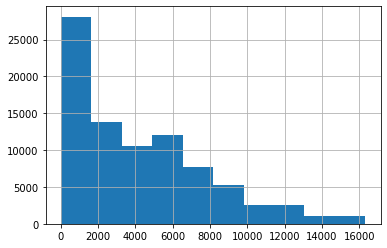

In [41]:
#let's see the distribution of Block
data['BLOCK'].hist()
print(data['BLOCK'].mean())

# The graph is skewed hence we can not replace it with mean, median would be a better choice

In [42]:
data['BLOCK'] = data['BLOCK'].fillna(data['BLOCK'].median())

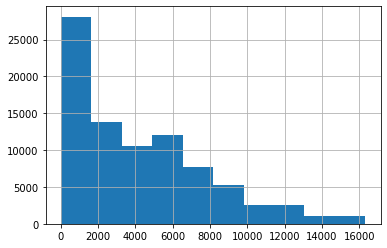

In [43]:
data['BLOCK'].hist()

In [44]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              50
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   9
BUILDING CLASS AT PRESENT             0
ZIP CODE                             35
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26251
GROSS SQUARE FEET                 27611
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14559
SALE DATE                             0
dtype: int64

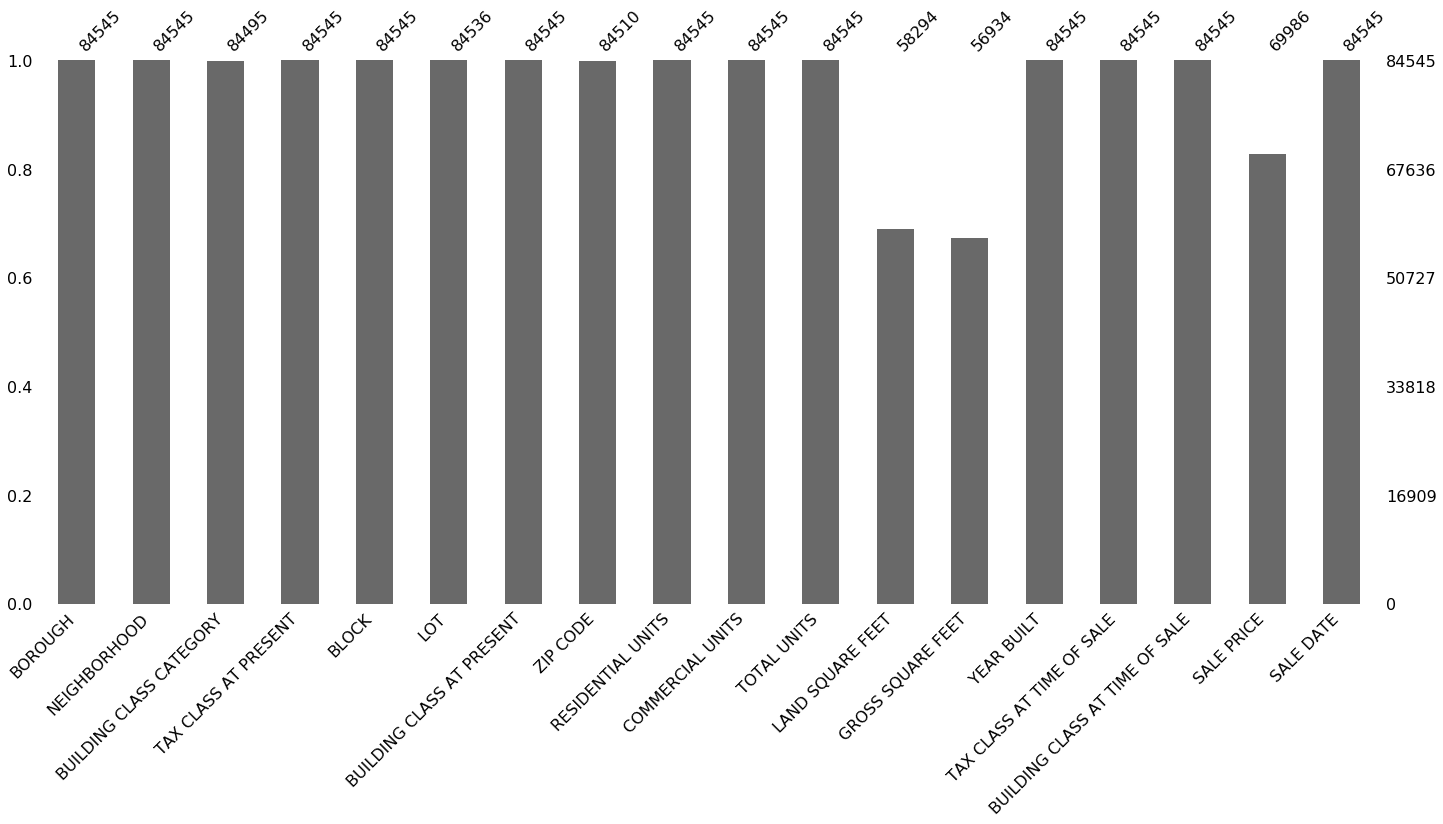

In [45]:
#see the completeness of the data using mano.bar
mano.bar(data)

## This indicates that LAND SQUARE FEET and GROSS SQUARE FEET can have some significance 

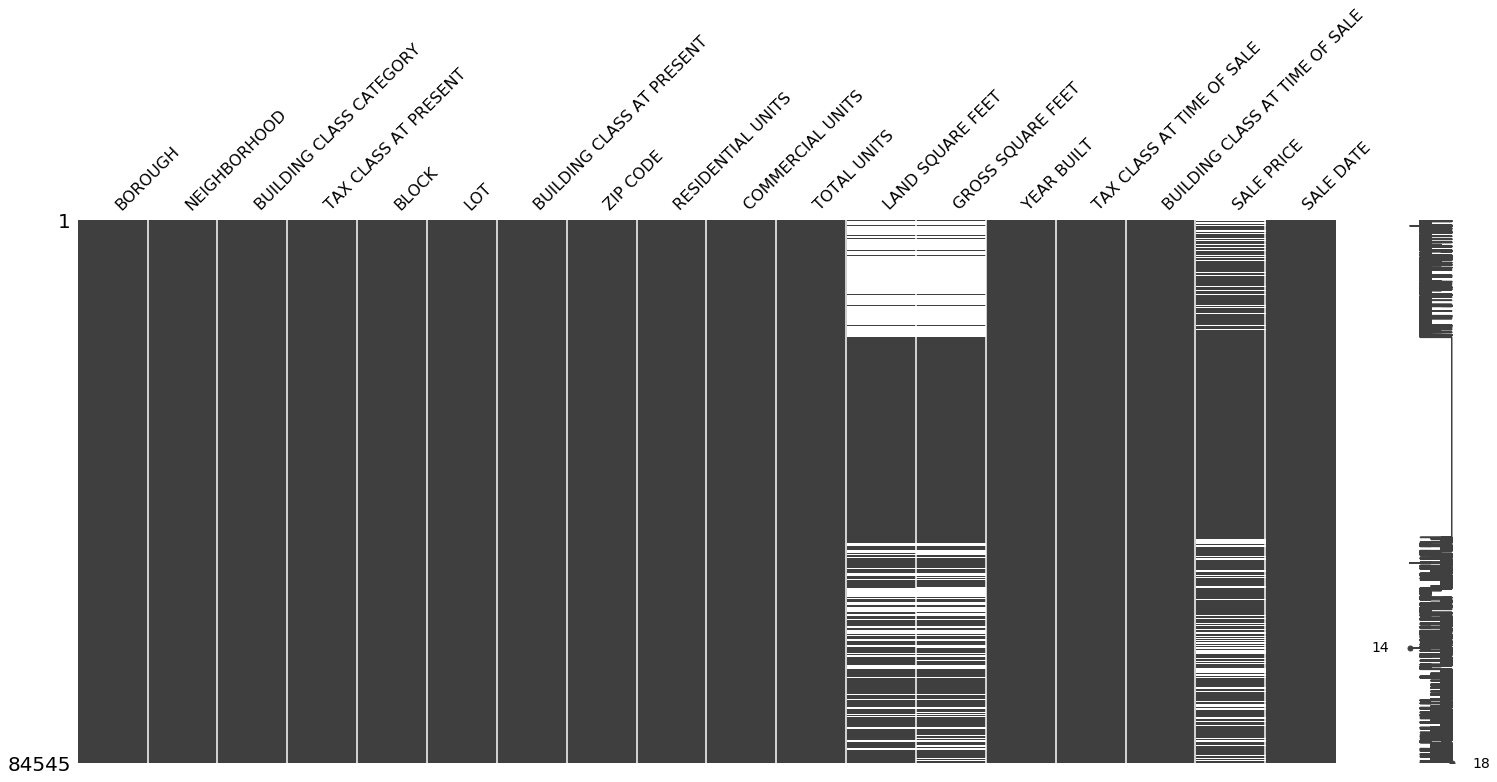

In [46]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(data)

## LAND SQUARE FEET, GROSS SQUARE FEET and SALES PRICE has similar missing patterns, hence we can do mean imputation

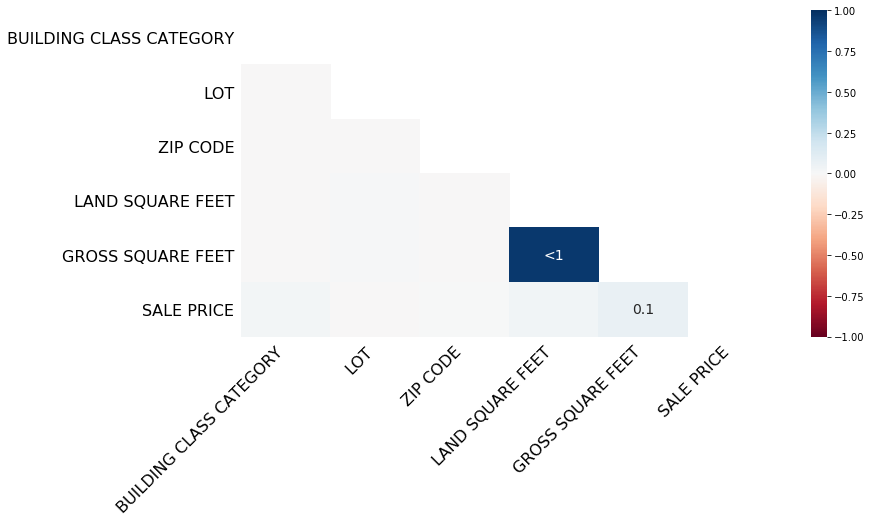

In [47]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(data, figsize=(12,6))

In [48]:
#create a separate data frame for mean imputation
data2 = data.copy(deep=True)

mean_imputation = SimpleImputer(strategy='mean')

#take only columns where mean imputation matters, i.e., numerical columns
data2[['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']] = mean_imputation.fit_transform(data2[['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']])

In [49]:
data2.isna().sum()

BOROUGH                            0
NEIGHBORHOOD                       0
BUILDING CLASS CATEGORY           50
TAX CLASS AT PRESENT               0
BLOCK                              0
LOT                                9
BUILDING CLASS AT PRESENT          0
ZIP CODE                          35
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

## Building Class Category

In [50]:
data2['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4348
07 RENTALS - WALKUP APARTMENTS                   3464
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1426
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [51]:
data2['BUILDING CLASS CATEGORY'].describe()

count                                           84495
unique                                             47
top       01 ONE FAMILY DWELLINGS                    
freq                                            18235
Name: BUILDING CLASS CATEGORY, dtype: object

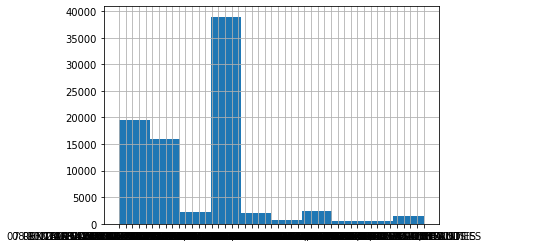

In [52]:
data2['BUILDING CLASS CATEGORY'].hist()

In [53]:
#find out the BOROUGH where BUILDING CLASS CATEGORY are missing 
print(data2[data2['BUILDING CLASS CATEGORY'].isna()]['BOROUGH'])

50055    4
50056    4
50057    4
50058    4
50059    4
50060    4
50061    4
50062    4
50063    4
50064    4
50065    4
50066    4
50067    4
50068    4
50069    4
50070    4
50071    4
50072    4
50073    4
50074    4
50075    4
50076    4
66614    4
66615    4
66616    4
66617    4
66618    4
66619    4
66620    4
66621    4
66622    4
66624    4
66625    4
66626    4
66627    4
66628    4
80248    5
80249    5
80250    5
80251    5
80252    5
80253    5
80254    5
80255    5
80256    5
80257    5
80258    5
80259    5
80260    5
80261    5
Name: BOROUGH, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


# Predicts a sequence

In [54]:
data2['BUILDING CLASS CATEGORY'].fillna(method='ffill',inplace=True)

In [55]:
data2.isna().sum()

BOROUGH                            0
NEIGHBORHOOD                       0
BUILDING CLASS CATEGORY            0
TAX CLASS AT PRESENT               0
BLOCK                              0
LOT                                9
BUILDING CLASS AT PRESENT          0
ZIP CODE                          35
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84545 entries, 1 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84545 non-null  category      
 1   NEIGHBORHOOD                    84545 non-null  object        
 2   BUILDING CLASS CATEGORY         84545 non-null  category      
 3   TAX CLASS AT PRESENT            84545 non-null  object        
 4   BLOCK                           84545 non-null  float64       
 5   LOT                             84536 non-null  float64       
 6   BUILDING CLASS AT PRESENT       84545 non-null  category      
 7   ZIP CODE                        84510 non-null  float64       
 8   RESIDENTIAL UNITS               84545 non-null  int64         
 9   COMMERCIAL UNITS                84545 non-null  int64         
 10  TOTAL UNITS                     84545 non-null  int64         
 11  LA

## ZIP Code

## Let's fill some of the data with Forward fill

In [57]:
data2['ZIP CODE'].fillna(method='ffill',inplace=True)

In [58]:
data2.isna().sum()

BOROUGH                            0
NEIGHBORHOOD                       0
BUILDING CLASS CATEGORY            0
TAX CLASS AT PRESENT               0
BLOCK                              0
LOT                                9
BUILDING CLASS AT PRESENT          0
ZIP CODE                          14
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

# We still have missing data, so now we will use KNN Imputation

In [59]:
from sklearn.impute import KNNImputer
imputer = KNNImputer (n_neighbors=2)
data2_knn = data2.copy(deep=True)
data2_knn[['ZIP CODE']] = imputer.fit_transform(data2_knn[['ZIP CODE']])
data2_knn

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,C7,10732.124085,28,3,31,4616.0,18690.0,1900,2,C7,1.276380e+06,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,C7,10732.124085,16,1,17,2212.0,7803.0,1900,2,C7,1.276380e+06,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,402.0,21.0,C4,10732.124085,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,404.0,55.0,C2,10732.124085,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,406.0,32.0,C4,10732.124085,8,0,8,1750.0,4226.0,1920,2,C4,3.192840e+06,2016-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34.0,B9,10309.000000,2,0,2,2400.0,2575.0,1998,1,B9,4.500000e+05,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78.0,B9,10309.000000,2,0,2,2498.0,2377.0,1998,1,B9,5.500000e+05,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60.0,B2,10309.000000,2,0,2,4000.0,1496.0,1925,1,B2,4.600000e+05,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28.0,K6,10309.000000,0,7,7,208033.0,64117.0,2001,4,K6,1.169334e+07,2016-12-21


In [60]:
data2_knn.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               9
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## LOT 

In [61]:
print(data2_knn[data2_knn['LOT'].isna()]['BOROUGH'])

553      1
967      1
1519     1
2003     1
2509     1
2601     1
2624     1
2647     1
56295    4
Name: BOROUGH, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [62]:
data2_knn['LOT'].describe()

count    84536.000000
mean       376.204079
std        658.144517
min          1.000000
25%         22.000000
50%         50.000000
75%       1001.000000
max       9106.000000
Name: LOT, dtype: float64

## We will simply impute it with mode

In [63]:
data2_knn['LOT'] = data2_knn['LOT'].fillna(data2_knn['LOT'].mode())

In [64]:
data2_knn.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               9
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Lets drop the rows for now. Since they are only 9 

In [65]:
data2_knn = data2_knn[data2_knn['LOT'].notna()]

In [66]:
data2_knn.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## Data is cleaned now! 

In [67]:
data = data2_knn.copy(deep=True)

Copied the data 

In [68]:
data.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Detect Outliers

In [69]:
# for visualization purposes, we replace borough numbering with their string names
data['BOROUGH'] = data['BOROUGH'].astype(str)
data['BOROUGH'] = data['BOROUGH'].str.replace("1", "Manhattan")
data['BOROUGH'] = data['BOROUGH'].str.replace("2", "Bronx")
data['BOROUGH'] = data['BOROUGH'].str.replace("3", "Brooklyn")
data['BOROUGH'] = data['BOROUGH'].str.replace("4", "Queens")
data['BOROUGH'] = data['BOROUGH'].str.replace("5", "Staten Island")

In [70]:
data['BOROUGH'].value_counts()

Queens           26734
Brooklyn         24047
Manhattan        18296
Staten Island     8410
Bronx             7049
Name: BOROUGH, dtype: int64

Most of the properties are bought in Queens

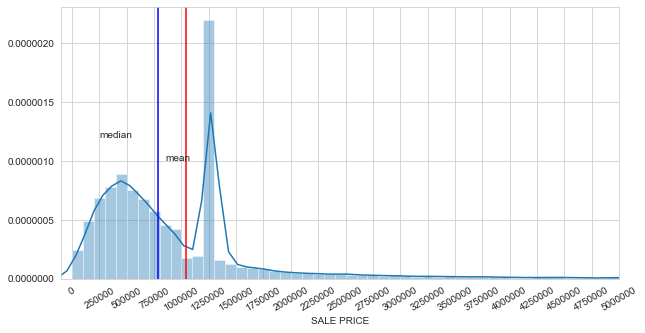

In [71]:
# house prices greater than 10M probably represents outliers.
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plotd = sns.distplot(data[(data['SALE PRICE']>100) & (data['SALE PRICE'] < 10000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(data[(data['SALE PRICE']>100) & (data['SALE PRICE'] < 10000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(data[(data['SALE PRICE']>100) & (data['SALE PRICE'] < 10000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

Prices are skewed to the right. Most of the prices are around 250 and 750 thousands range. The mean is around 10M

## We will detect outliers using box plot and scatter plot

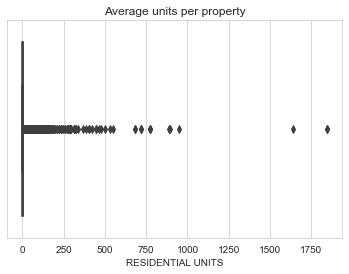

In [72]:
#Data contains many outliers, mainly due to commercial property sales
sns.boxplot(x='RESIDENTIAL UNITS',data=data)
plt.title('Average units per property')
plt.show()

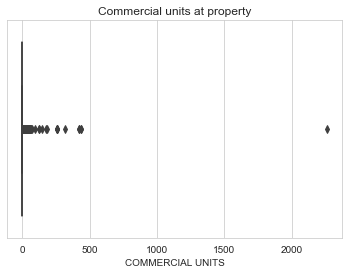

In [73]:
sns.boxplot(x='COMMERCIAL UNITS',data=data)
plt.title('Commercial units at property')
plt.show()

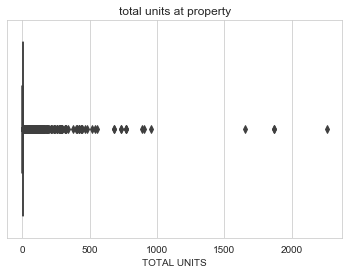

In [74]:
sns.boxplot(x='TOTAL UNITS',data=data)
plt.title('total units at property')
plt.show()

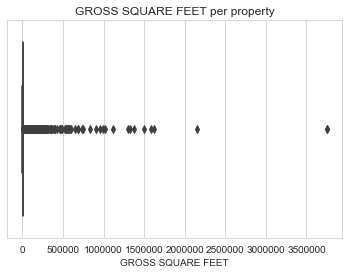

In [75]:
sns.boxplot(x='GROSS SQUARE FEET',data=data)
plt.title('GROSS SQUARE FEET per property')
plt.show()

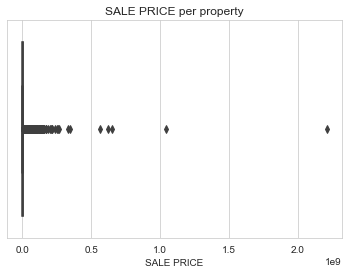

In [76]:
sns.boxplot(x='SALE PRICE',data=data)
plt.title('SALE PRICE per property')
plt.show()

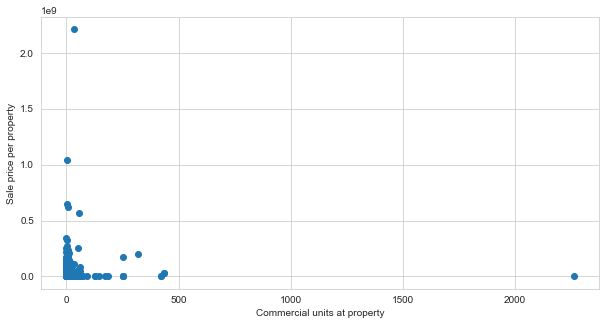

In [77]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data['COMMERCIAL UNITS'], data['SALE PRICE'])
ax.set_xlabel('Commercial units at property')
ax.set_ylabel('Sale price per property')
plt.show()

## You can notice the outliers in the top left and botton tight

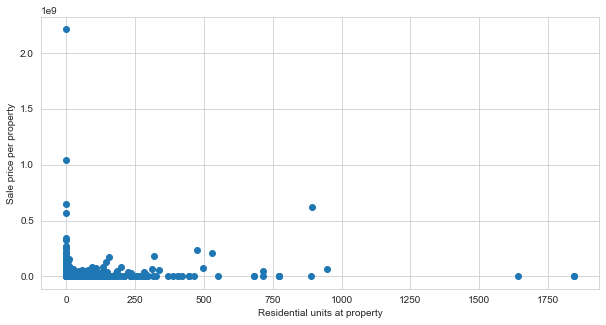

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data['RESIDENTIAL UNITS'], data['SALE PRICE'])
ax.set_xlabel('Residential units at property')
ax.set_ylabel('Sale price per property')
plt.show()

## This has many outliers too 

In [79]:
data[data['YEAR BUILT']<1800]['YEAR BUILT'].value_counts()

0       6969
1111       1
1680       1
Name: YEAR BUILT, dtype: int64

In [80]:
data[data['YEAR BUILT']<1800]['BUILDING CLASS CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS                 3082
05 TAX CLASS 1 VACANT LAND                      1171
04 TAX CLASS 1 CONDOS                            424
31 COMMERCIAL VACANT LAND                        419
44 CONDO PARKING                                 387
12 CONDOS - WALKUP APARTMENTS                    275
29 COMMERCIAL GARAGES                            255
15 CONDOS - 2-10 UNIT RESIDENTIAL                251
17 CONDO COOPS                                   183
47 CONDO NON-BUSINESS STORAGE                    118
41 TAX CLASS 4 - OTHER                           109
43 CONDO OFFICE BUILDINGS                         92
45 CONDO HOTELS                                   53
46 CONDO STORE BUILDINGS                          39
48 CONDO TERRACES/GARDENS/CABANAS                 25
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT        21
06 TAX CLASS 1 - OTHER                            20
36 OUTDOOR RECREATIONAL FACILITIES                12
03 THREE FAMILY DWELLINGS                     

Above table brings some new insight into why some properties do not have a year or number of units in them. These are vacant lands, elevators, parking and garages

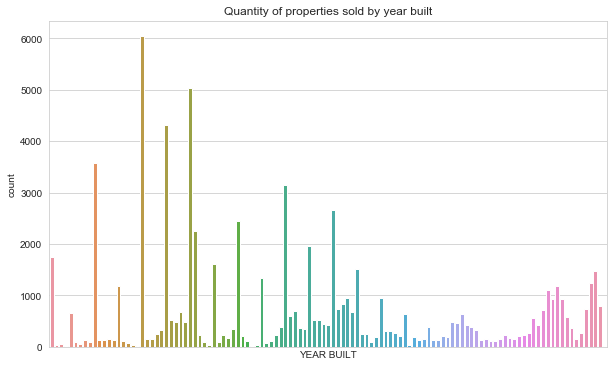

In [81]:
plt.figure(figsize=(10,6))
plotd=sns.countplot(x=data[data['YEAR BUILT']>1900]['YEAR BUILT'])
#tick_spacing=1 # set spacing for each tick
#plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plotd.set_xlim([1900, 2020])
plt.tick_params(labelbottom=False)
plt.xticks(rotation=30) 
plt.title("Quantity of properties sold by year built")
plt.show()

Most of the properties were built around 1920s.

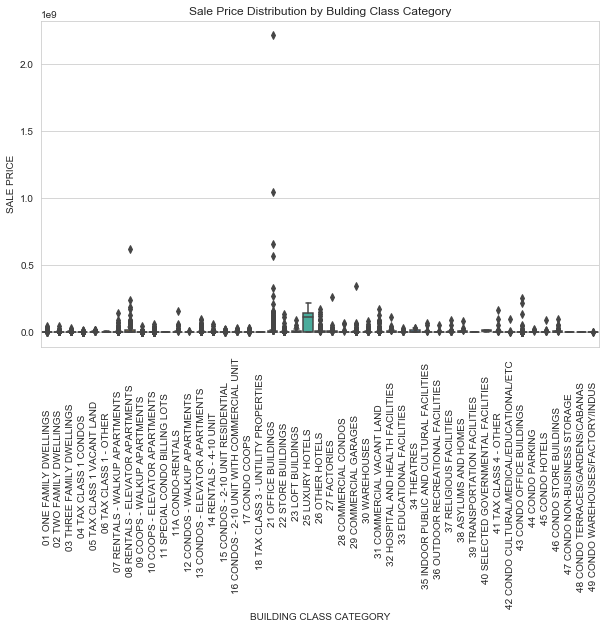

In [82]:
plt.figure(figsize=(10,6))
order = sorted(data['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=data, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

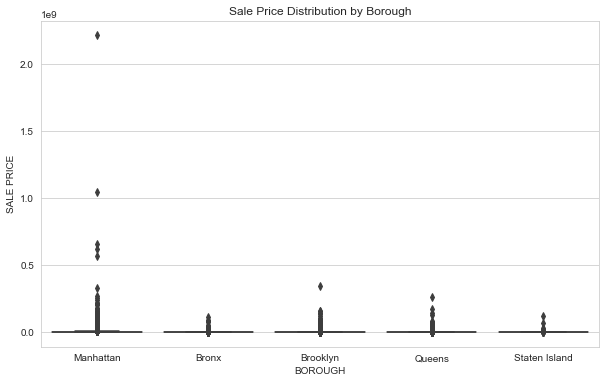

In [83]:
# Sales prices by borough
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

As you can see, there are many outliers in the data

## Conduct EDA (by using scatterplots, bar, correlation heatmaps, histograms, t-tests, anova, chisquared, normality tests, qqplots etc.) and describe at each step what you understand about the data

In [84]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

In [85]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [86]:
#t-test
t_val, p_val = stats.ttest_ind(data['SALE PRICE'], data['RESIDENTIAL UNITS'])
print("(SALE PRICE, RESIDENTIAL UNITS) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(SALE PRICE, RESIDENTIAL UNITS) => t-value=35.76106976078185, p-value=4.956618253910918e-279


A large t-score tells us that the SALE PRICE is not associated with RESIDENTIAL UNITS.

In [87]:
#t-test
t_val, p_val = stats.ttest_ind(data['SALE PRICE'], data['YEAR BUILT'])
print("(SALE PRICE, YEAR BUILT) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(SALE PRICE, YEAR BUILT) => t-value=35.71099409151857, p-value=2.931802040116634e-278


In [88]:
data['sale_year'] = pd.DatetimeIndex(data['SALE DATE']).year.astype("category")
data['sale_month'] = pd.DatetimeIndex(data['SALE DATE']).month.astype("category")
pd.crosstab(data['sale_month'],data['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6868
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6317
8,0,5680
9,7778,0


In [89]:
df_bar=data[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,sale_month,Sales_count
0,1,6868
1,2,6323
2,3,7705
3,4,6402
4,5,7461
5,6,8293
6,7,6317
7,8,5680
8,9,7778
9,10,6750


## Monthly Sales Count. Looks very consistent

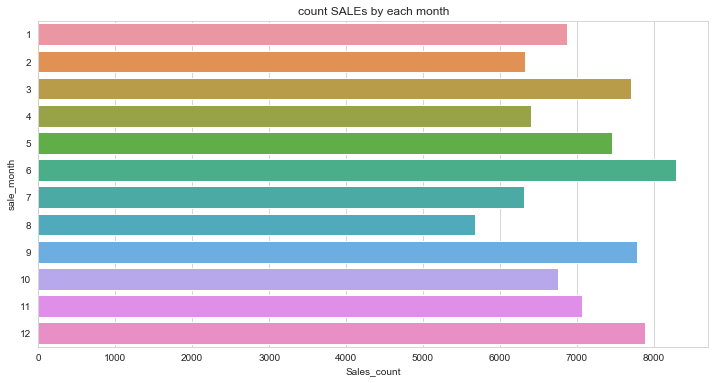

In [90]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'sale_month', x = 'Sales_count', data = df_bar )
plt.title('count SALEs by each month')
plt.show()

Most of the sales happen during the summer. This makes sense since summer time is the best time for most buyers to go out and explore options

In [91]:
df_bar=data[['NEIGHBORHOOD', 'SALE PRICE']].groupby(by='NEIGHBORHOOD').count().sort_values(by='NEIGHBORHOOD', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,NEIGHBORHOOD,Sales_count
0,AIRPORT LA GUARDIA,8
1,ALPHABET CITY,202
2,ANNADALE,198
3,ARDEN HEIGHTS,278
4,ARROCHAR,45
...,...,...
249,WOODHAVEN,413
250,WOODLAWN,85
251,WOODROW,131
252,WOODSIDE,440


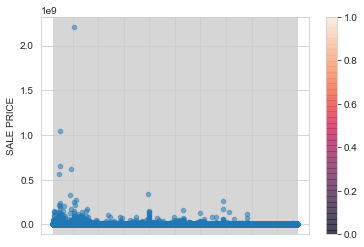

In [94]:
data.plot(x='NEIGHBORHOOD',y='SALE PRICE',kind='scatter',alpha=0.5,cmap='rainbow')

## Distribution of SALE PRICE across NEIGHBORHOOD